# Chapter 3: Linear Regression - Applied Exercises

## Exercise 3.8:
This question involves the use of simple linear regression on the Auto data set.

(a) Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summarize() function to print the results. Comment on the output. For example:

i. Is there a relationship between the predictor and the response?

ii. How strong is the relationship between the predictor and the response?

iii. Is the relationship between the predictor and the response positive or negative?

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

### Answer:

i.

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [13]:
auto_df = pd.read_csv('../Chapter_02/data/Auto.csv')
auto_df.drop(auto_df[auto_df['horsepower']=='?'].index, inplace=True)
auto_df['horsepower'] = auto_df['horsepower'].astype(int)

In [14]:
pred = auto_df['horsepower'].astype('int64')
res = auto_df['mpg'].astype('int64')
pred = sm.add_constant(pred)

In [15]:
model = sm.OLS(res, pred)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     603.6
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           3.27e-81
Time:                        15:42:31   Log-Likelihood:                -1174.9
No. Observations:                 392   AIC:                             2354.
Df Residuals:                     390   BIC:                             2362.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.6690      0.711     55.819      0.000      38.272      41.066
horsepower    -0.1568      0.006    -24.568      0.000      -0.169      -0.144
==============================================================================
Omnibus:                       16.642   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.551
Skew:                           0.499   Prob(JB):                     0.000154
Kurtosis:                       3.283   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the p-value of horsepower (<0.05) we can assume that it has a significant relationship with mpg.

ii. Based on the absolute value of horsepower's coefficient (<1) we can say that changes of horsepower wil cause small variation in mpg so their correlation is not strong.

iii. The coefficient of predictor hold a negative value, hence they have negative relationship.

iv.


In [16]:
prediction_obj = result.get_prediction((1,98))
prediction = prediction_obj.predicted_mean.round(2)
conf_int = prediction_obj.conf_int(alpha=0.05).round(2)
pred_int = prediction_obj.conf_int(obs=True, alpha=0.05).round(2)

In [17]:
print(f"The Prediction mean for 98 horsepower is {prediction} with 95% confidence interval of {conf_int} and prediction interval of {pred_int}")

The Prediction mean for 98 horsepower is [24.3] with 95% confidence interval of [[23.81 24.79]] and prediction interval of [[14.73 33.86]]


(b) Plot the response and the predictor in a new set of axes ax. Use the ax.axline() method or the abline() function defined in the lab to display the least squares regression line.

### Answer:

In [18]:
import matplotlib.pyplot as plt 

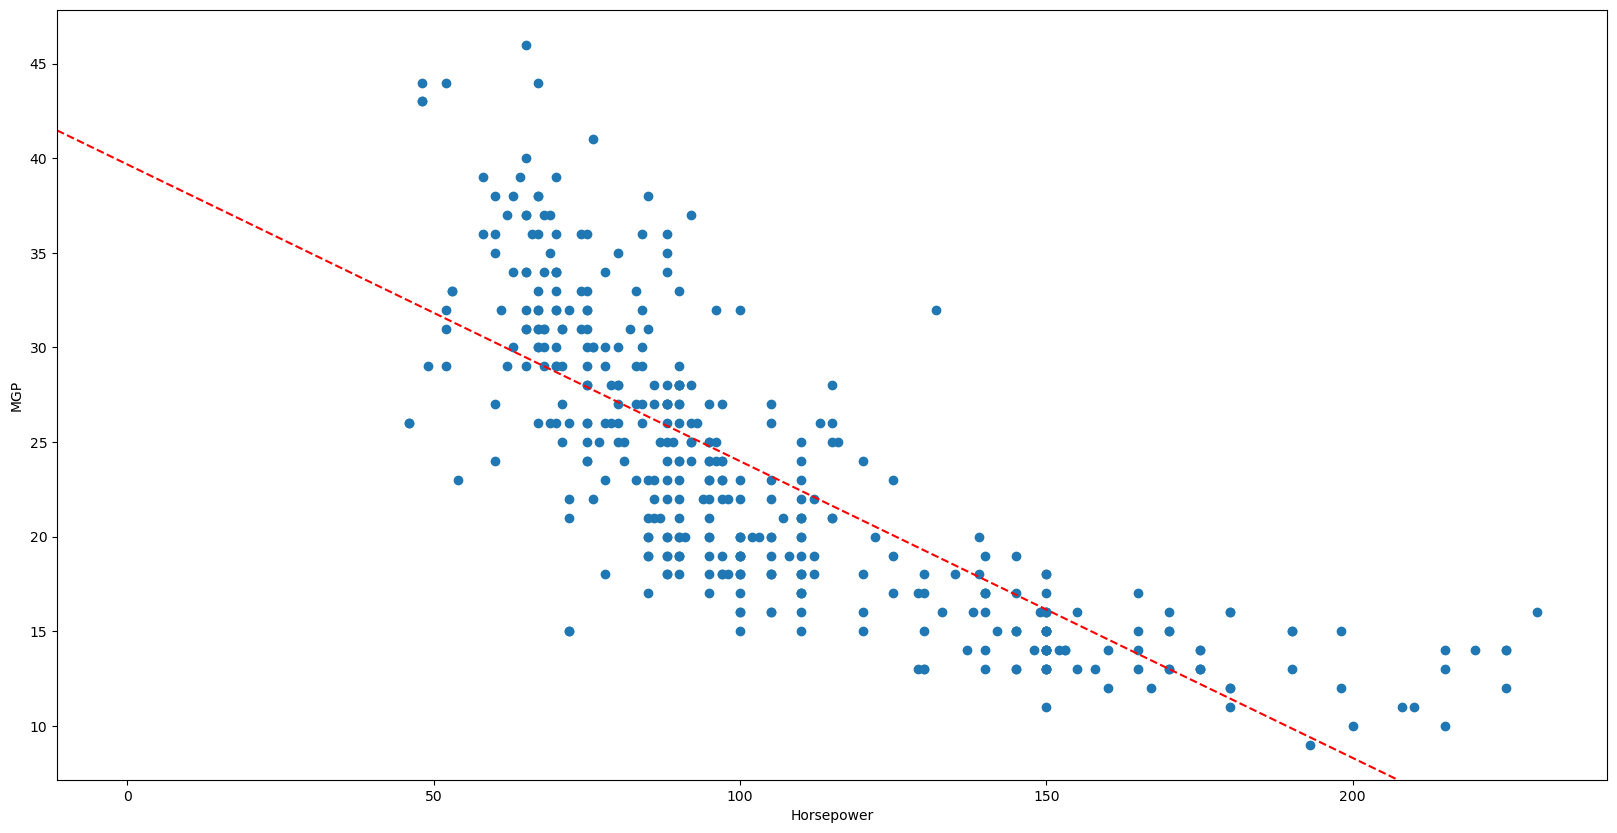

In [19]:
fig, ax =plt.subplots(figsize=(20,10))
ax.scatter(pred.iloc[:, 1], res)
xlim = ax.get_xlim()
ylim = [result.params.iloc[1] * xlim[0] + result.params.iloc[0], 
        result.params.iloc[1] * xlim[1] + result.params.iloc[0]]
ax.axline((0, result.params.iloc[0]),
          slope=result.params.iloc[1],
          color='red',
          ls='--')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MGP')
plt.show()

(c) Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

### Answer:

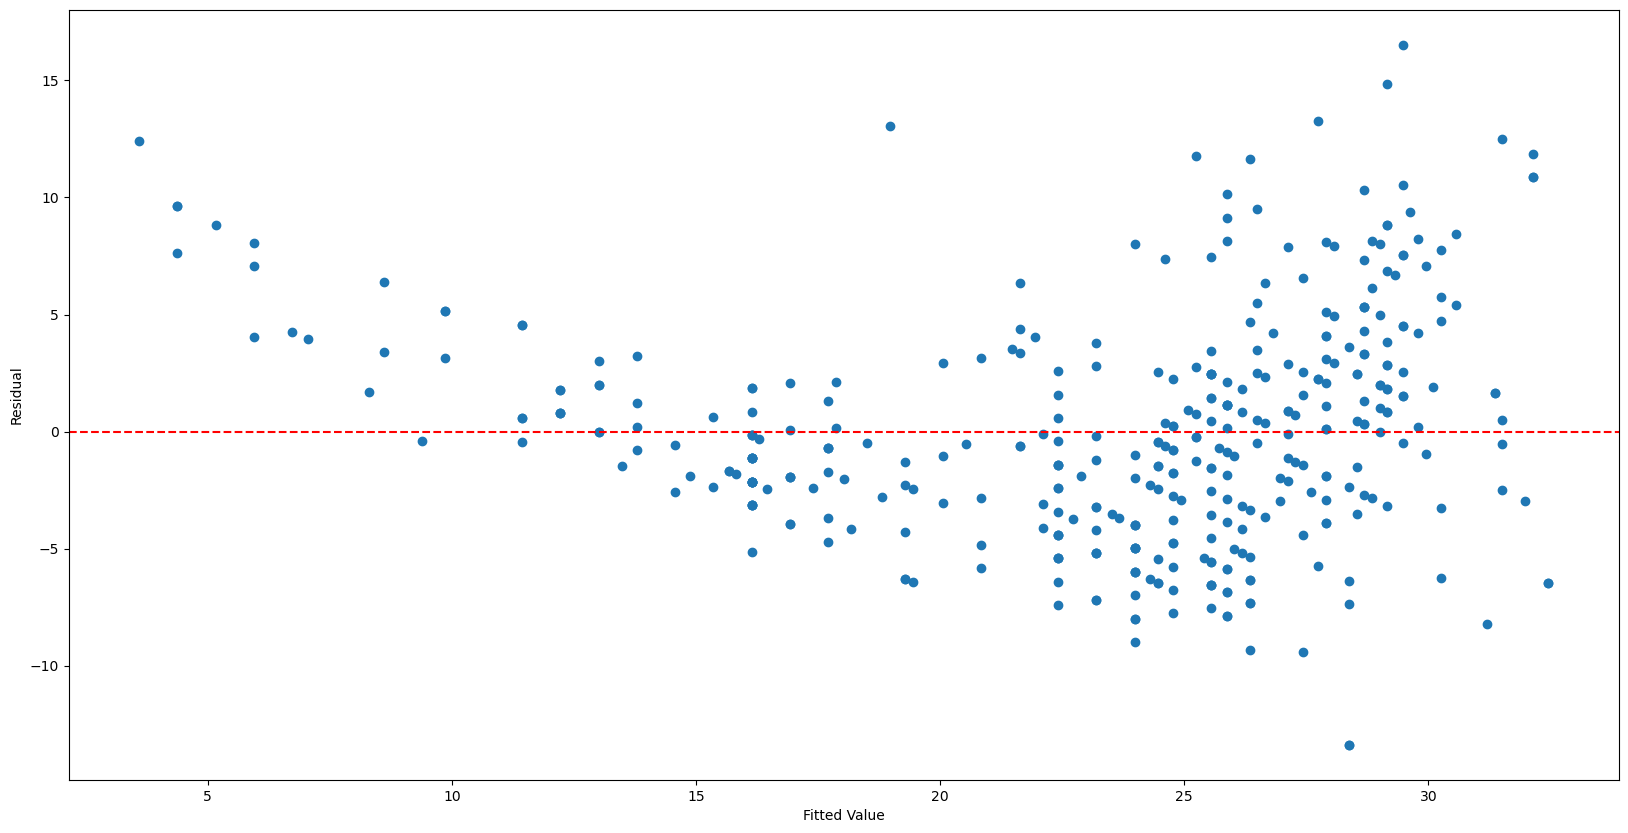

In [20]:
fig, ax =plt.subplots(figsize=(20,10))
ax.scatter(result.fittedvalues, result.resid)
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residual')
ax.axhline(0, c='red', ls='--')

No relationship can be determined through the residual plot.

Text(0, 0.5, 'Leverage')

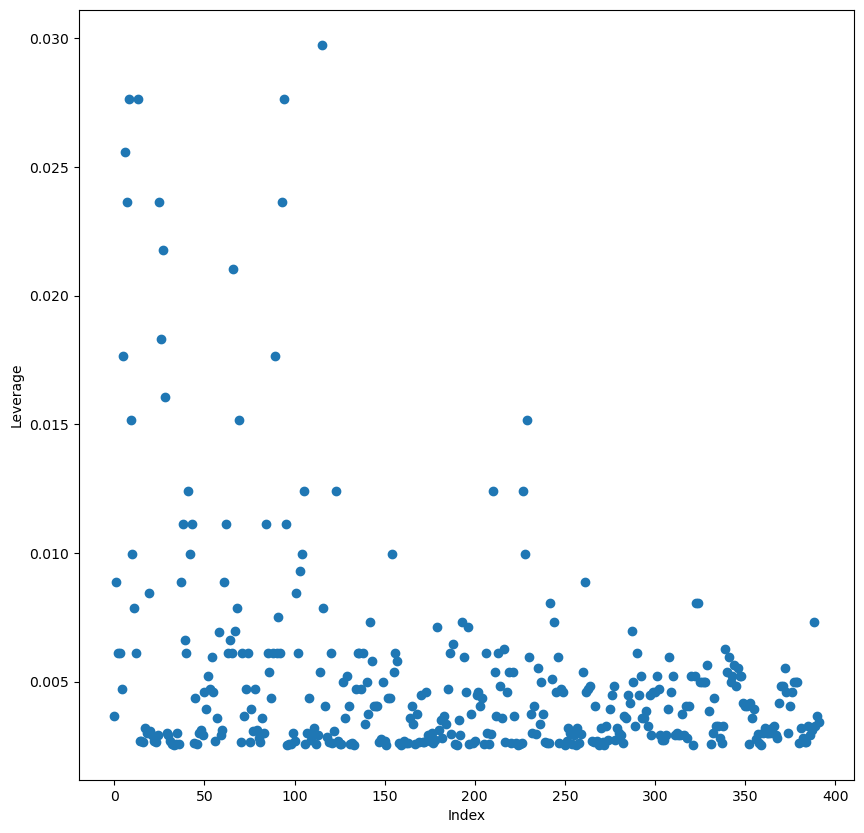

In [21]:
infl = result.get_influence()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(np.arange(pred.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

Since all the predictor's leverage score is lower than (p+1)/n (0.005), we assume that we do not have an observation with high leverage.

---

## Exercise 3.9:

This question involves the use of multiple linear regression on the Auto data set.

(a) Produce a scatterplot matrix which includes all of the variables in the data set.

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

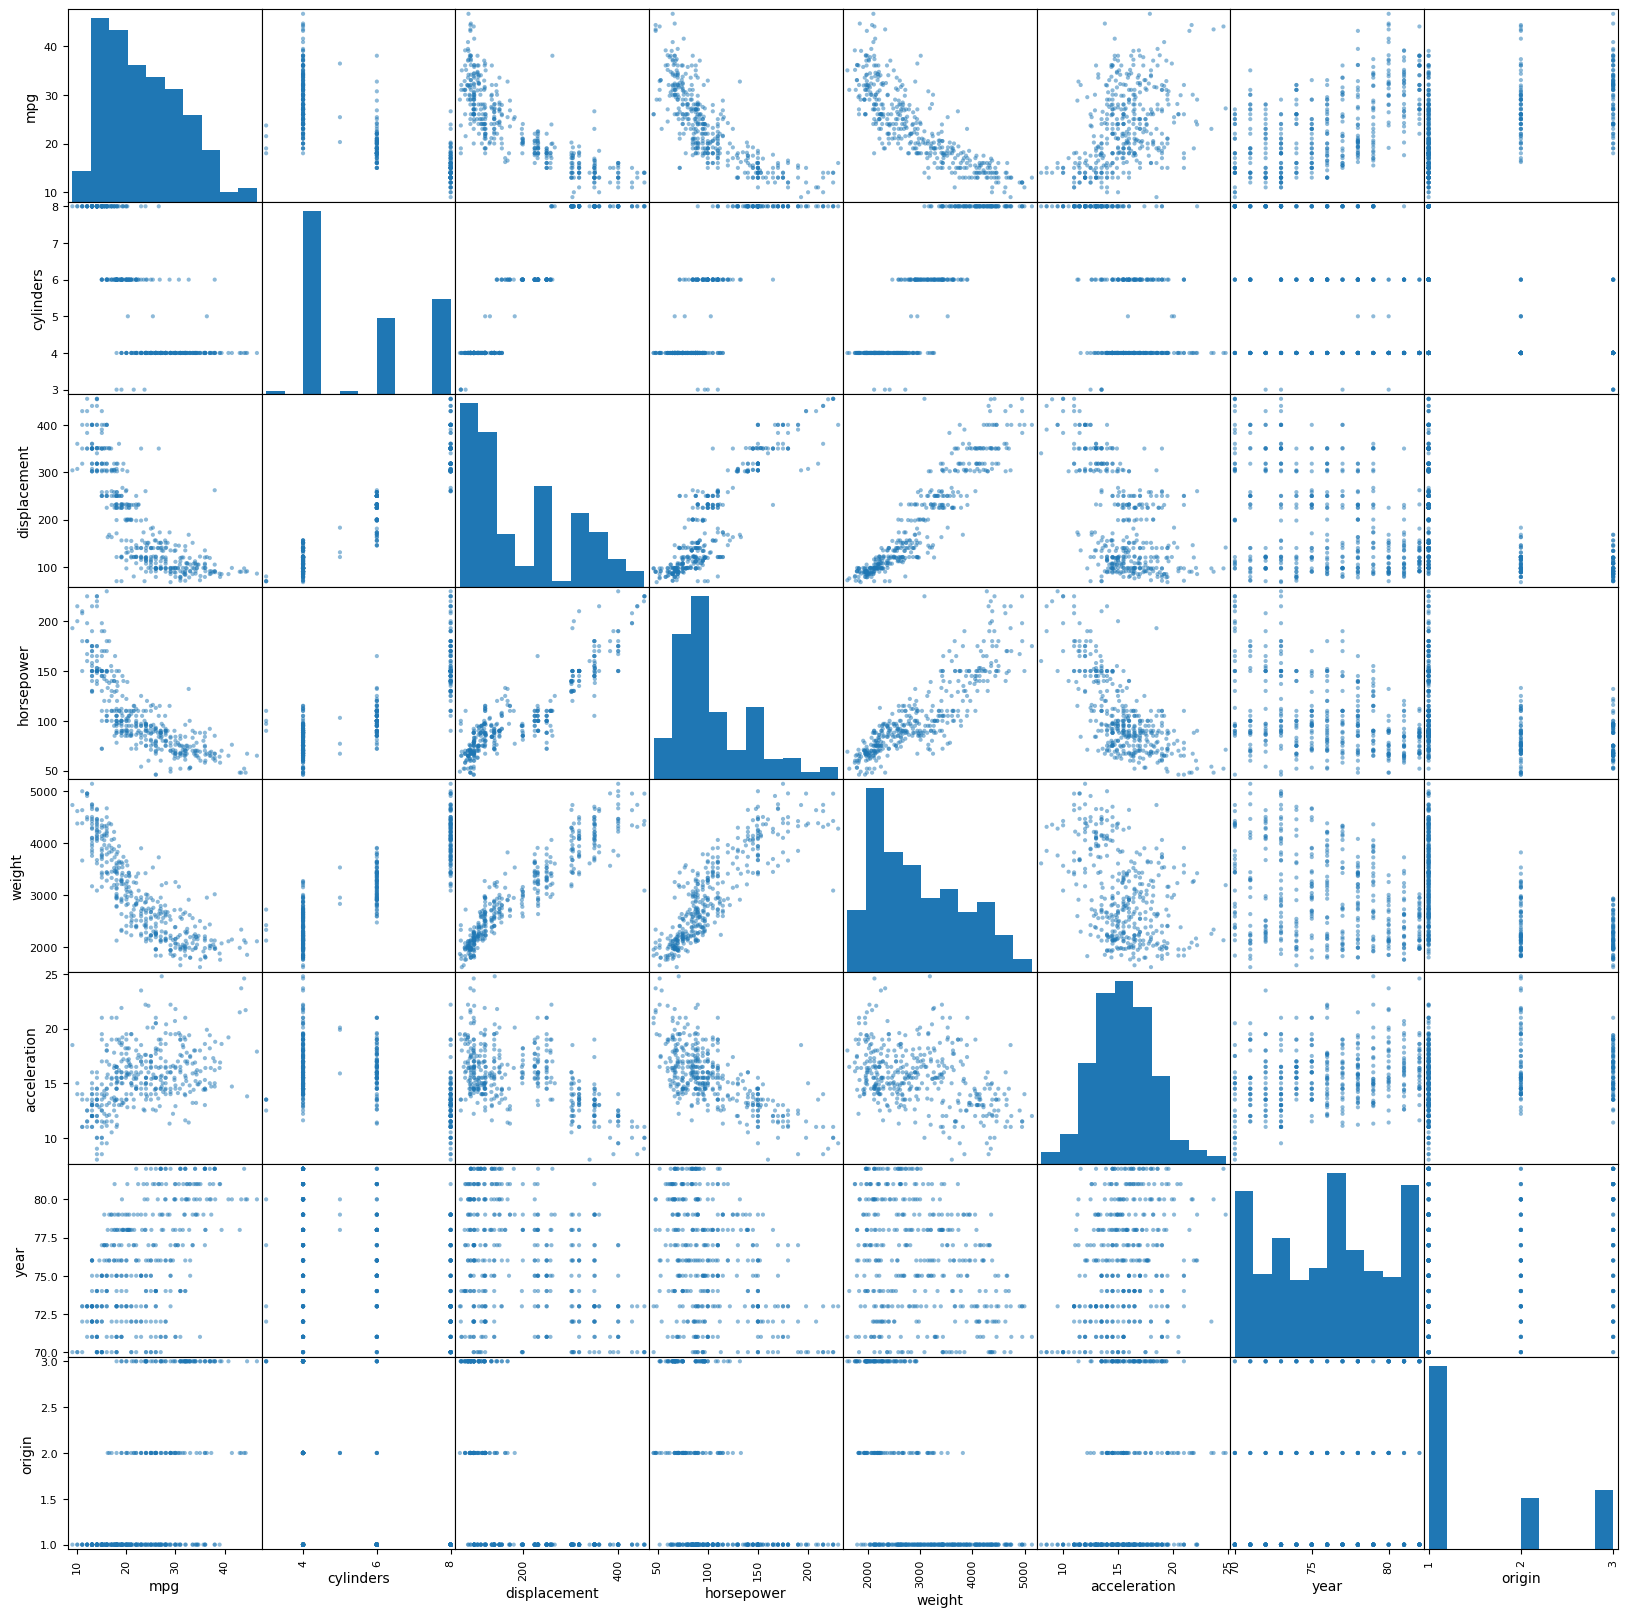

In [22]:
pd.plotting.scatter_matrix(auto_df ,figsize=(20, 20))

(b) Compute the matrix of correlations between the variables using the DataFrame.corr() method.

### Answer:

In [27]:
del auto_df['name']

<Axes: >

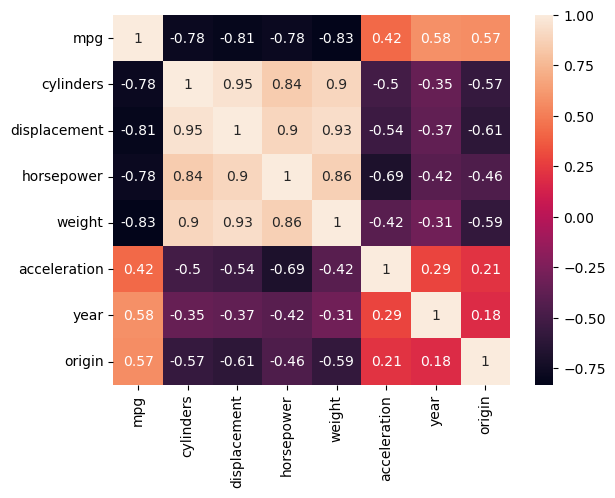

In [28]:
import seaborn as sns

corr = auto_df.corr()
sns.heatmap(corr, annot=True)

(c) Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. Comment on the outputFor instance:

i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the year variable suggest?

### Answer:

In [37]:
X = sm.add_constant(auto_df.iloc[:, 1:])
y = auto_df.iloc[:, 0]

In [45]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 08 Aug 2024   Prob (F-statistic):          2.04e-139
Time:                        16:09:13   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i. The F-statistic of the results are much higher than one and so we reject the null hypothesis that says non of the predictors have relationship with the response variable.

ii. By looking at the p-value of each predictors, we can assume that displacement, weight, year and origin have a significant impact on the target value.

iii. The coefficient of year suggests that each year that is added, mpg increase for nearly 0.75, if all other predictors are constant.

(d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?
